### Importing the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from pathlib import Path
import requests
import os

# Setting to make numbers easier to read on display
pd.options.display.float_format = "{:20.3f}".format

### Downloading the Dataset

In [2]:
import os
import requests
import zipfile
import io
import pandas as pd

# Dataset URL
url = "https://archive.ics.uci.edu/static/public/502/online+retail+ii.zip"

# File paths
dataset_dir = "Dataset"
file_name = "online_retail_II.xlsx"
file_path = os.path.join(dataset_dir, file_name)

# Check if the Excel file already exists
if os.path.exists(file_path):
    print(f"Dataset already exists at: {file_path}")
else:
    # Download the zip file
    response = requests.get(url)
    if response.status_code == 200:
        # Create the dataset directory if it doesn't exist
        os.makedirs(dataset_dir, exist_ok=True)
        
        # Extract the zip file contents
        with zipfile.ZipFile(io.BytesIO(response.content)) as zip_file:
            zip_file.extractall(dataset_dir)
        print(f"Downloaded and extracted to: {dataset_dir}")
    else:
        print(f"Failed to download: {url}, HTTP Status Code: {response.status_code}")

Dataset already exists at: Dataset\online_retail_II.xlsx


### Data Exploration

In [3]:
dataset = pd.read_excel(file_path, sheet_name = 0)

print("First 5 rows of the dataset.\n")
dataset.head()

First 5 rows of the dataset.



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950,13085.000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100,13085.000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
dataset.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000,525461,525461.000,417534.000
mean,10.338,2010-06-28 11:37:36.845017856,4.689,15360.645
min,-9600.000,2009-12-01 07:45:00,-53594.360,12346.000
25%,1.000,2010-03-21 12:20:00,1.250,13983.000
50%,3.000,2010-07-06 09:51:00,2.100,15311.000
75%,10.000,2010-10-15 12:45:00,4.210,16799.000
max,19152.000,2010-12-09 20:01:00,25111.090,18287.000
std,107.424,NaN,146.127,1680.811


In [6]:
dataset.describe(include ="O")

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [7]:
(dataset["Customer ID"].isna().sum())

107927

In [8]:
# Number of NaN values in the "Customer ID" column.
print("Number of NaN values in the column 'Customer ID' is: {0}".format(dataset["Customer ID"].isna().sum()))

Number of NaN values in the column 'Customer ID' is: 107927


In [9]:
# First 5 rows of dataset in which the Customer ID is NaN.
dataset[dataset["Customer ID"].isna()].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.000,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.000,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.000,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.000,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.550,NaN,United Kingdom


In [10]:
# Number of the rows which has value = 0 or less for the Quantity
print("Number of rows which has value <= 0 for the column \"Quantity\" is: {0}".format(len(dataset[dataset["Quantity"] <= 0])))

Number of rows which has value <= 0 for the column "Quantity" is: 12326


In [11]:
dataset[dataset["Quantity"] <= 0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.950,16321.000,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.650,16321.000,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.250,16321.000,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.100,16321.000,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.950,16321.000,Australia


In [12]:
# Changing the datatype of the invoice column so that we can apply regex
dataset["Invoice"] = dataset["Invoice"].astype("str")

# Returning all the vaues which does not have exactly 6 digits
dataset[dataset["Invoice"].str.match("^\\d{6}$") == False].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.950,16321.000,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.650,16321.000,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.250,16321.000,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.100,16321.000,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.950,16321.000,Australia


In [13]:
# Checking the number of unique characters that came after the digits in the StockCode column
dataset["Invoice"].str.replace("[0-9]", "", regex = True).unique()

array(['', 'C', 'A'], dtype=object)

In [14]:
# Invoices that starts with the letter "A"
dataset[dataset["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.360,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.790,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.870,NaN,United Kingdom


In [15]:
dataset["StockCode"] = dataset["StockCode"].astype("str")

dataset[(dataset["StockCode"].str.match("^\\d{5}$") == False) &
        (dataset["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [16]:
dataset[dataset["StockCode"].str.contains("^DOT")].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.190,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.960,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.390,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.350,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.390,NaN,United Kingdom


### Data Cleaning

In [17]:
cleaned_df = dataset.copy()

Only keeping the rows with the valid Invoice (i.e., valid 6-digit numbers).

In [18]:
# First converting the Invoice column into str type
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")

# Creating a mask to filter the rows with only rows that satisfies the required criteria
mask = (
    cleaned_df["Invoice"].str.match("^\\d{6}$") == True
)

# Applying the above created mask on the dataset
cleaned_df = cleaned_df[mask]

cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950,13085.000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100,13085.000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom


Only keeping the rows that satisfies the criteria for the StockCode column.

In [19]:
# First converting the column "StockCode" into str.
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

# Creating the mask with the required criterias:
# 1. A 5-digit number (regex pattern for exactly 5 digits)
# 2. A 5-digit number followed by one or more letters
# 3. The exact string "PADS"
mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True) |
    (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True) |
    (cleaned_df["StockCode"].str.match("^PADS$") == True)
)

# Applying the above created mask on the dataset
cleaned_df = cleaned_df[mask]

cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950,13085.000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100,13085.000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom


Dropping any NaN values in the Customer ID column.

In [20]:
cleaned_df.dropna(subset = ["Customer ID"], inplace = True)

In [21]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.000,406337,406337.000,406337.000
mean,13.619,2010-07-01 10:11:06.543288320,2.991,15373.633
min,1.000,2009-12-01 07:45:00,0.000,12346.000
25%,2.000,2010-03-26 14:01:00,1.250,14004.000
50%,5.000,2010-07-09 15:48:00,1.950,15326.000
75%,12.000,2010-10-14 17:09:00,3.750,16814.000
max,19152.000,2010-12-09 20:01:00,295.000,18287.000
std,97.001,NaN,4.286,1677.366


In [22]:
print("Number of rows having \"Price\" value = 0 is: {0}".format(len(cleaned_df[cleaned_df["Price"] == 0])))

Number of rows having "Price" value = 0 is: 28


Still the minimum price is 0, we will be removing this now.

In [23]:
cleaned_df = cleaned_df[cleaned_df["Price"] > 0]

In [24]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.000,406309,406309.000,406309.000
mean,13.618,2010-07-01 10:14:25.869572352,2.992,15373.722
min,1.000,2009-12-01 07:45:00,0.001,12346.000
25%,2.000,2010-03-26 14:01:00,1.250,14006.000
50%,5.000,2010-07-09 15:48:00,1.950,15326.000
75%,12.000,2010-10-14 17:09:00,3.750,16814.000
max,19152.000,2010-12-09 20:01:00,295.000,18287.000
std,96.999,NaN,4.286,1677.329


$$
\text{cleaned\_data\_percent} = \left(1 - \frac{\text{len(cleaned\_df)}}{\text{len(dataset)}}\right) \times 100
$$

In [25]:
cleaned_data_percent = (1 - (len(cleaned_df) / len(dataset))) * 100

print("Percentage of data that has been deleted during the cleaning process: {0:.3f}%.".format(cleaned_data_percent))

Percentage of data that has been deleted during the cleaning process: 22.676%.


### Feature Engineering

Creating a new column "SalesLineTotal" using "Quantity" and "Price".

$$
\text{SalesLineTotal} = \text{Quantity} \times \text{Price}
$$

In [26]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]

cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950,13085.000,United Kingdom,83.400
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom,81.000
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750,13085.000,United Kingdom,81.000
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.100,13085.000,United Kingdom,100.800
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.250,13085.000,United Kingdom,30.000


Now, aggregating the data by grouping on the Customer ID.

In [27]:
aggregated_df = cleaned_df.groupby(by = "Customer ID", as_index = False) \
                          .agg(
                              MonetaryValue = ("SalesLineTotal", "sum"),
                              Frequency = ("Invoice", "nunique"),
                              LastInvoiceDate = ("InvoiceDate", "max")
                          )

aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.000,169.360,2,2010-06-28 13:53:00
1,12347.000,1323.320,2,2010-12-07 14:57:00
2,12348.000,221.160,1,2010-09-27 14:59:00
3,12349.000,2221.140,2,2010-10-28 08:23:00
4,12351.000,300.930,1,2010-11-29 15:23:00


In [28]:
aggregated_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
count,4285.000,4285.000,4285.000,4285
mean,15356.807,2024.127,4.426,2010-09-11 00:06:10.431738624
min,12346.000,1.550,1.000,2009-12-01 10:49:00
25%,13891.000,307.560,1.000,2010-07-27 14:39:00
50%,15362.000,702.900,2.000,2010-10-19 12:10:00
75%,16840.000,1704.290,5.000,2010-11-22 11:24:00
max,18287.000,349164.350,183.000,2010-12-09 20:01:00
std,1699.839,8813.946,7.938,NaN


Creating a new column "Recency" that calculates the number of days since the most recent date.

In [29]:
# First finding the last date of the purchase
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.000,169.360,2,2010-06-28 13:53:00,164
1,12347.000,1323.320,2,2010-12-07 14:57:00,2
2,12348.000,221.160,1,2010-09-27 14:59:00,73
3,12349.000,2221.140,2,2010-10-28 08:23:00,42
4,12351.000,300.930,1,2010-11-29 15:23:00,10


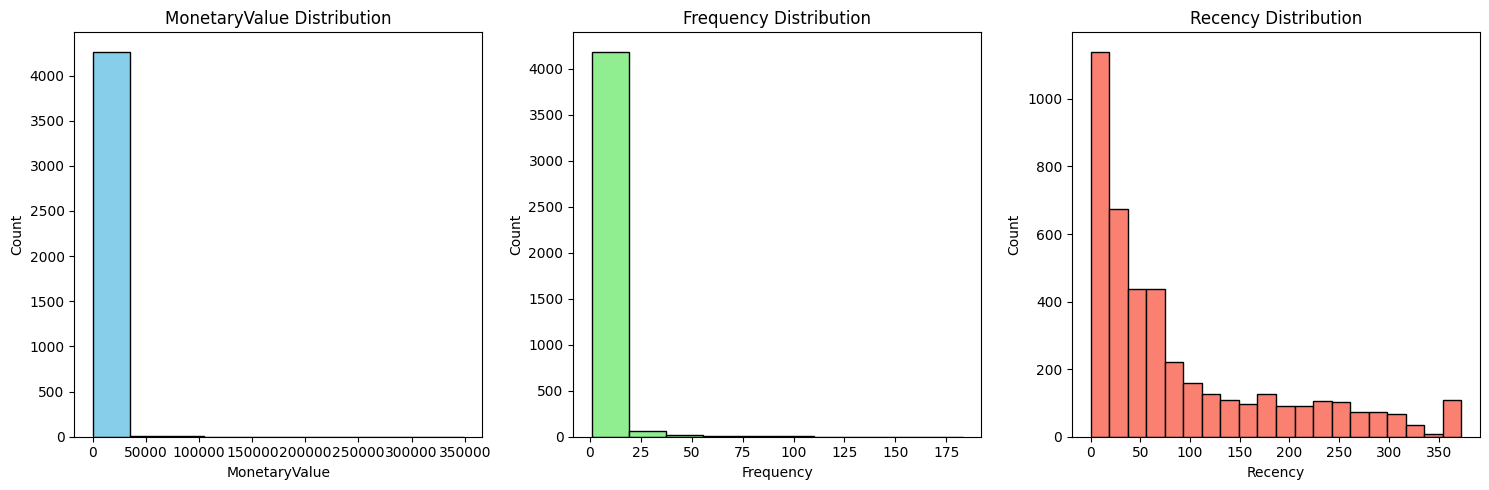

In [30]:
# Plotting Monetary Value, Frequency, and Recency Distributions
plt.figure(figsize = (15, 5))

col_names = ["MonetaryValue", "Frequency", "Recency"]
colors = ["skyblue", "lightgreen", "salmon"]
bins = [10, 10, 20]

for i, (col, c, b) in enumerate(zip(col_names, colors, bins)):
    plt.subplot(1, 3, i+1)
    plt.hist(aggregated_df[col], bins = b, color = c, edgecolor = "black")
    plt.title(f"{str(col)} Distribution")
    plt.xlabel(str(col))
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

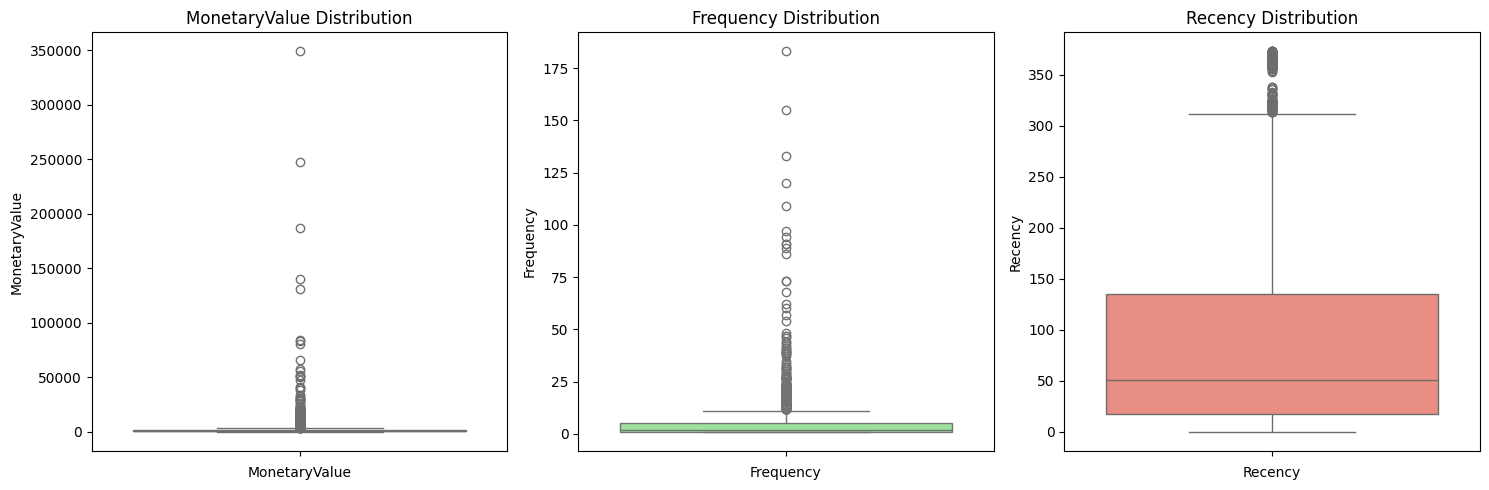

In [31]:
# Plotting Monetary Value, Frequency, and Recency BoxPlots
plt.figure(figsize = (15, 5))

col_names = ["MonetaryValue", "Frequency", "Recency"]
colors = ["skyblue", "lightgreen", "salmon"]

for i, (col, c) in enumerate(zip(col_names, colors)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data = aggregated_df[col], color = c)
    plt.title(f"{str(col)} Distribution")
    plt.xlabel(str(col))
plt.tight_layout()
plt.show()

Now, removing the Outliers using the IQR method.

$$
\text{IQR} = \text{75th percentile} - \text{25th percentile}
$$

In [32]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)

M_IQR = M_Q3 - M_Q1

monetary_outliers = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 + (M_IQR * 1.5))) | 
                                  (aggregated_df["MonetaryValue"] < (M_Q3 - (M_IQR * 1.5)))].copy()

monetary_outliers.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.000,423.000,423.000,423,423.000
mean,15103.040,12188.102,17.168,2010-11-09 12:26:02.978723328,30.035
min,12357.000,3802.040,1.000,2009-12-10 18:03:00,0.000
25%,13622.000,4605.940,8.000,2010-11-08 13:17:30,3.000
50%,14961.000,6191.320,12.000,2010-11-26 12:19:00,13.000
75%,16692.000,10273.235,18.000,2010-12-06 10:34:30,31.000
max,18260.000,349164.350,183.000,2010-12-09 19:32:00,364.000
std,1728.661,25830.851,19.730,NaN,51.541


In [33]:
F_Q1 = aggregated_df["Frequency"].quantile(0.25)
F_Q3 = aggregated_df["Frequency"].quantile(0.75)

F_IQR = F_Q3 - F_Q1

frequency_outliers = aggregated_df[(aggregated_df["Frequency"] > (F_Q3 + (F_IQR * 1.5))) | 
                                   (aggregated_df["Frequency"] < (F_Q3 - (F_IQR * 1.5)))].copy()

frequency_outliers.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.000,279.000,279.000,279,279.000
mean,15352.656,14409.715,23.810,2010-11-23 11:06:20.645161216,16.090
min,12437.000,1094.390,12.000,2010-05-12 16:51:00,0.000
25%,13800.000,4331.560,13.000,2010-11-20 13:14:30,2.000
50%,15465.000,6615.770,17.000,2010-12-02 10:46:00,7.000
75%,16828.500,11692.405,23.000,2010-12-07 11:08:30,19.000
max,18260.000,349164.350,183.000,2010-12-09 19:32:00,211.000
std,1748.430,31381.737,21.933,NaN,26.589


Now, that we have outliers for both "MonetaryValue" and "Frequency". For non outline values we will take every value other than those in these datasets.

In [34]:
non_outlier_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers.index)) &
                               (~aggregated_df.index.isin(frequency_outliers.index))]

non_outlier_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.000,3809.000,3809.000,3809,3809.000
mean,15376.483,885.502,2.863,2010-09-03 11:16:46.516146176,97.082
min,12346.000,1.550,1.000,2009-12-01 10:49:00,0.000
25%,13912.000,279.910,1.000,2010-07-08 14:48:00,22.000
50%,15389.000,588.050,2.000,2010-10-12 16:25:00,58.000
75%,16854.000,1269.050,4.000,2010-11-17 13:14:00,154.000
max,18287.000,3788.210,11.000,2010-12-09 20:01:00,373.000
std,1693.200,817.672,2.244,NaN,98.111


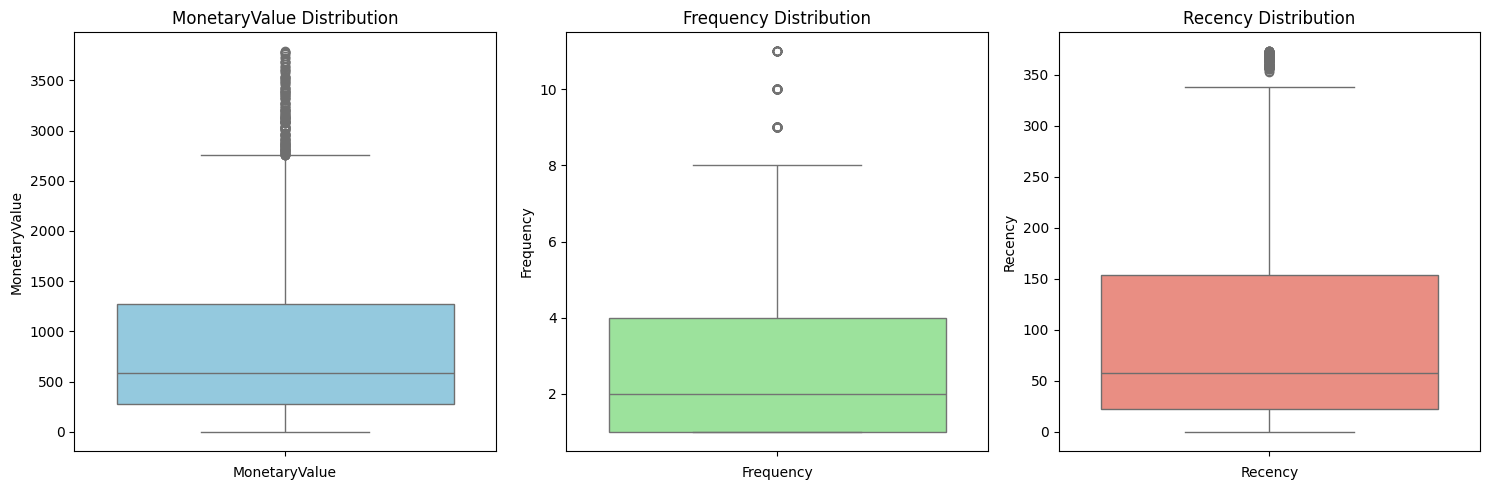

In [35]:
# Plotting BoxPlots of Monetary Value, Frequency, and Recency for the non_outlier_df 
plt.figure(figsize = (15, 5))

col_names = ["MonetaryValue", "Frequency", "Recency"]
colors = ["skyblue", "lightgreen", "salmon"]

for i, (col, c) in enumerate(zip(col_names, colors)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data = non_outlier_df[col], color = c)
    plt.title(f"{str(col)} Distribution")
    plt.xlabel(str(col))
plt.tight_layout()
plt.show()

Now, plotting 3-D scatter plot of the customers data.

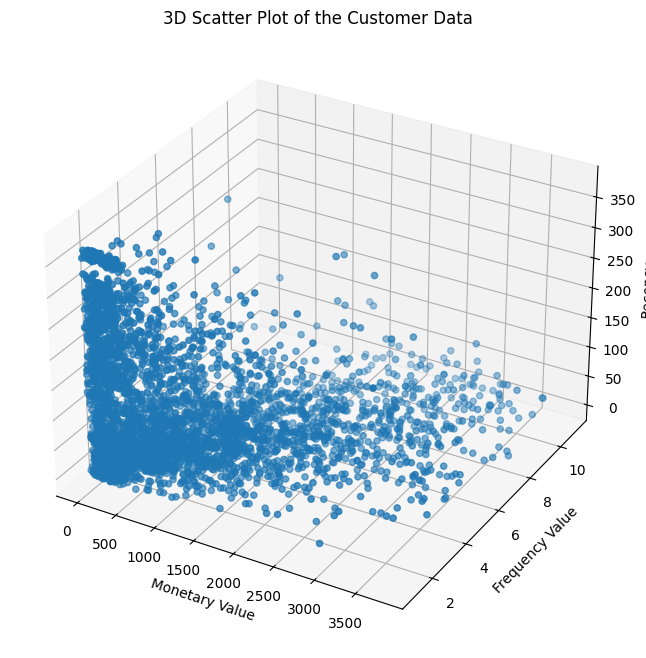

In [36]:
fig = plt.figure(figsize = (8, 8))

# Setting the projection to "3d"
ax = fig.add_subplot(projection = "3d")

scatter = ax.scatter(non_outlier_df["MonetaryValue"], non_outlier_df["Frequency"], non_outlier_df["Recency"])

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency Value")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter Plot of the Customer Data")
plt.show()

Scaling the Data using the StandartScaler

In [37]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outlier_df[["MonetaryValue", "Frequency", "Recency"]])
scaled_data[:10]

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       [ 1.63367793, -0.38488934, -0.56149798],
       [-0.71501622, -0.83063076, -0.88770034],
       [-0.66258002, -0.38488934, -0.88770034],
       [-0.6944307 , -0.83063076, -0.55130415],
       [-0.48594574, -0.83063076,  1.06951384],
       [ 2.74075818,  0.06085207, -0.83673122],
       [ 1.99801596,  0.06085207, -0.88770034]])

Converting the Numpy array to a Pandas DataFrame

In [38]:
scaled_data = pd.DataFrame(scaled_data,
                           index = non_outlier_df.index,
                           columns = ("MonetaryValue", "Frequency", "Recency"))

scaled_data.head()

,MonetaryValue,Frequency,Recency
0,-0.876,-0.385,0.682
1,0.536,-0.385,-0.969
2,-0.813,-0.831,-0.245
3,1.634,-0.385,-0.561
4,-0.715,-0.831,-0.888


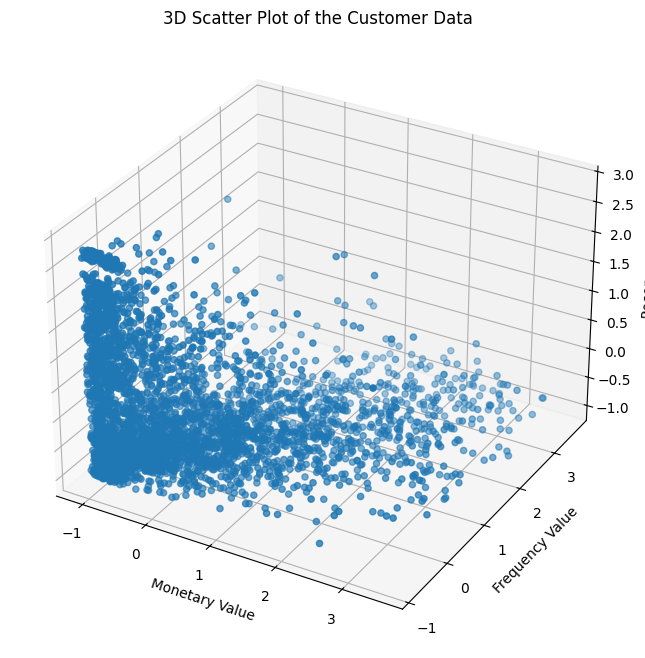

In [39]:
fig = plt.figure(figsize = (8, 8))

# Setting the projection to "3d"
ax = fig.add_subplot(projection = "3d")

scatter = ax.scatter(scaled_data["MonetaryValue"], scaled_data["Frequency"], scaled_data["Recency"])

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency Value")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter Plot of the Customer Data")
plt.show()

### KMeans Clustering

Here, we will be using the Elbow-Method to find the optimal number of clusters for the segmentation.

In [40]:
# Taking 12 as the maximum number of segmentations
max_k = 12

inertia = []
silhouette_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    # Applying KMeans algorithm
    kmeans = KMeans(n_clusters = k, random_state = 42, max_iter = 1000)

    # Predicting the labels
    cluster_labels = kmeans.fit_predict(scaled_data)

    sil_score = silhouette_score(scaled_data, cluster_labels)

    # Appending the silhouette score and inertia
    silhouette_scores.append(sil_score)
    inertia.append(kmeans.inertia_)

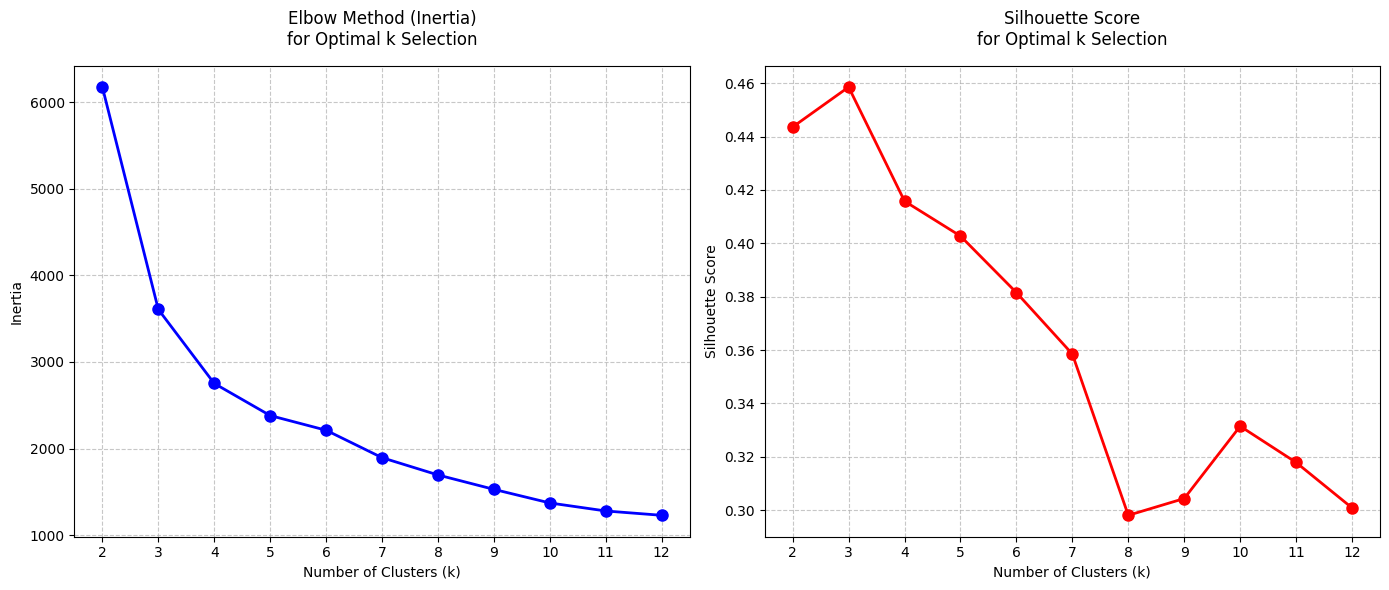

In [41]:
import matplotlib.pyplot as plt
import numpy as np

def plot_clustering_evaluation(k_values, inertia_values, silhouette_values):

    plt.style.use("default")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))
    
    # Inertia (Elbow) Plot
    ax1.plot(k_values, inertia_values, "bo-", linewidth = 2, markersize = 8)
    ax1.set_title("Elbow Method (Inertia)\nfor Optimal k Selection", pad = 15)
    ax1.set_xlabel("Number of Clusters (k)")
    ax1.set_ylabel("Inertia")
    ax1.grid(True, linestyle = "--", alpha = 0.7)
    ax1.set_xticks(k_values)
    
    # Silhouette Score Plot
    ax2.plot(k_values, silhouette_values, "ro-", linewidth = 2, markersize = 8)
    ax2.set_title("Silhouette Score\nfor Optimal k Selection", pad = 15)
    ax2.set_xlabel("Number of Clusters (k)")
    ax2.set_ylabel("Silhouette Score")
    ax2.grid(True, linestyle = "--", alpha = 0.7)
    ax2.set_xticks(k_values)
    
    # Layout adjustments
    plt.tight_layout()
    return fig

plot_clustering_evaluation(
    k_values = k_values,
    inertia_values = inertia,
    silhouette_values = silhouette_scores
)
plt.show()


By observing the above plots, we will be selection k = 4 as the number of clusters

In [42]:
kmeans = KMeans(n_clusters = 4, random_state = 42, max_iter = 1000)

cluster_labels = kmeans.fit_predict(scaled_data)

cluster_labels

array([1, 0, 2, ..., 1, 0, 0])

Adding these clusters to the non_outliers dataset.

In [43]:
non_outlier_df_cluster = non_outlier_df.copy()
non_outlier_df_cluster["Clusters"] = cluster_labels

non_outlier_df_cluster.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Clusters
0,12346.000,169.360,2,2010-06-28 13:53:00,164,1
1,12347.000,1323.320,2,2010-12-07 14:57:00,2,0
2,12348.000,221.160,1,2010-09-27 14:59:00,73,2
3,12349.000,2221.140,2,2010-10-28 08:23:00,42,0
4,12351.000,300.930,1,2010-11-29 15:23:00,10,2


Again plotting the customer data based on different clusters.

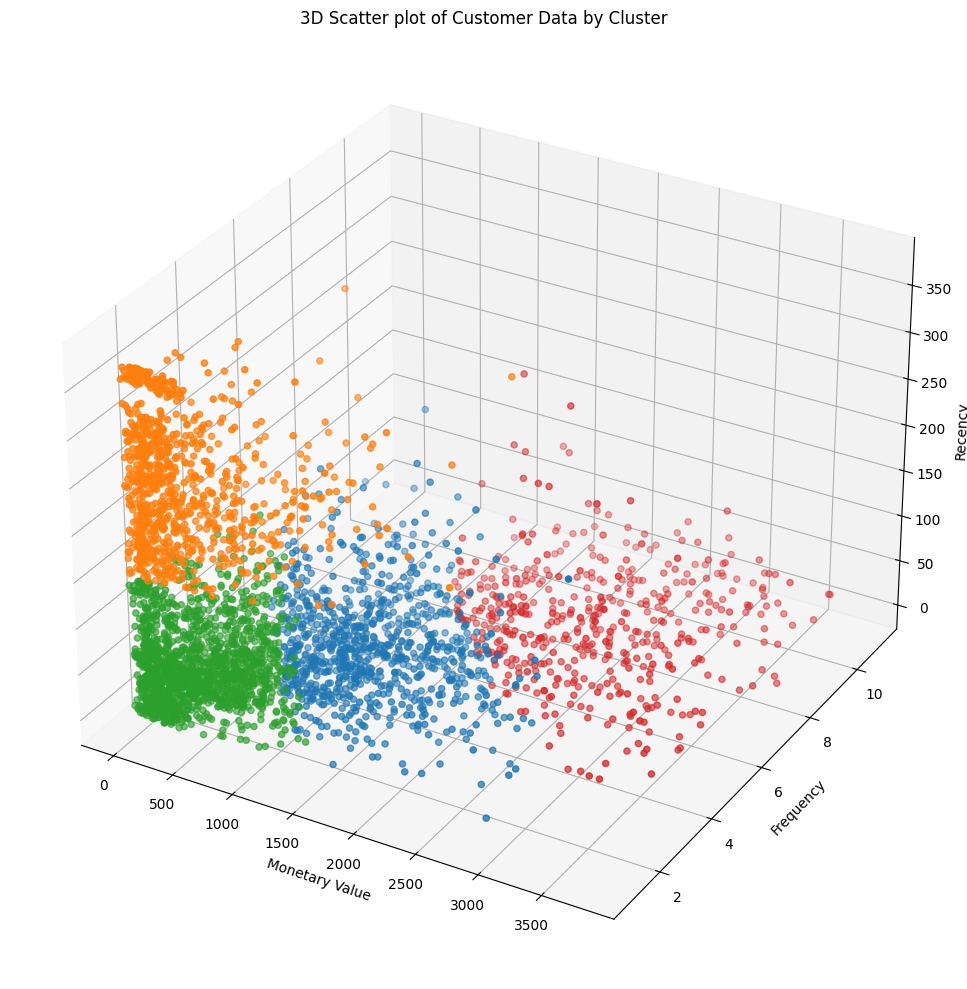

In [44]:
cluster_colors = {
    0: "#1f77b4", # Blue
    1: "#ff7f0e", # Orange
    2: "#2ca02c", # Green
    3: "#d62728"  # Red 
}

colors = non_outlier_df_cluster["Clusters"].map(cluster_colors)

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(projection = "3d")

scatter = ax.scatter(non_outlier_df_cluster["MonetaryValue"],
                     non_outlier_df_cluster["Frequency"],
                     non_outlier_df_cluster["Recency"],
                     c = colors,
                     marker = "o")

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter plot of Customer Data by Cluster")

plt.tight_layout()
plt.show()

Violin Graph

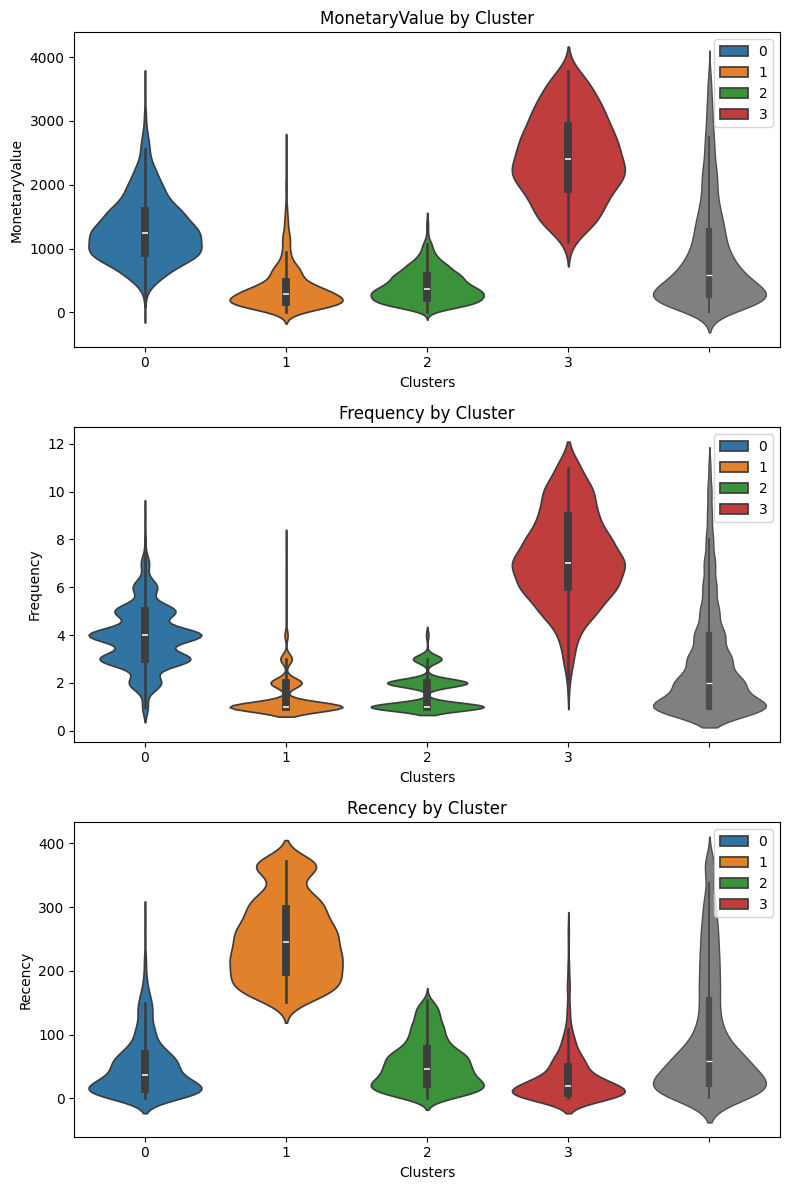

In [45]:
cols = ["MonetaryValue", "Frequency", "Recency"]

plt.figure(figsize = (8, 12))

for i, col in enumerate(cols):
    plt.subplot(3, 1, i+1)
    sns.violinplot(x = non_outlier_df_cluster["Clusters"], y = non_outlier_df_cluster[col], palette = cluster_colors, hue = non_outlier_df_cluster["Clusters"])
    sns.violinplot(y = non_outlier_df_cluster[col], color = "grey", linewidth = 1.0)
    plt.title(f"{col} by Cluster")
    plt.ylabel(f"{col}")

plt.tight_layout()
plt.show()

### Insights about different clusters

1. Cluster 0 (Blue): "Retain"
    - Moderate-value, frequent customers with recent activity.

2. Cluster 1 (Orange): "Re-Engage"
    - Low-value, infrequent customers with very old transactions.

3. Cluster 2 (Green): "Nurture"
    - Low-value, infrequent customers with moderately recent activity.
    
4. Cluster 3 (Red): "Reward"
    - High-value, frequent, and recent customers (likely the most loyal and valuable).

Managing the outliers data, by adding them into different clusters.

In [46]:
overlap_indices = monetary_outliers.index.intersection(frequency_outliers.index)

monetary_only_outliers = monetary_outliers.drop(overlap_indices)
frequency_only_outliers = frequency_outliers.drop(overlap_indices)
monetary_frequency_outliers = monetary_outliers.loc[overlap_indices]

monetary_only_outliers["Clusters"] = -1
frequency_only_outliers["Clusters"] = -2
monetary_frequency_outliers["Clusters"] = -3

outliers_clusters = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_frequency_outliers])
outliers_clusters.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Clusters
9,12357.000,11229.990,1,2010-11-16 10:05:00,23,-1
25,12380.000,4782.840,4,2010-08-31 14:54:00,100,-1
42,12409.000,12346.620,4,2010-10-15 10:24:00,55,-1
48,12415.000,19468.840,4,2010-11-29 15:07:00,10,-1
61,12431.000,4145.520,11,2010-12-01 10:03:00,8,-1


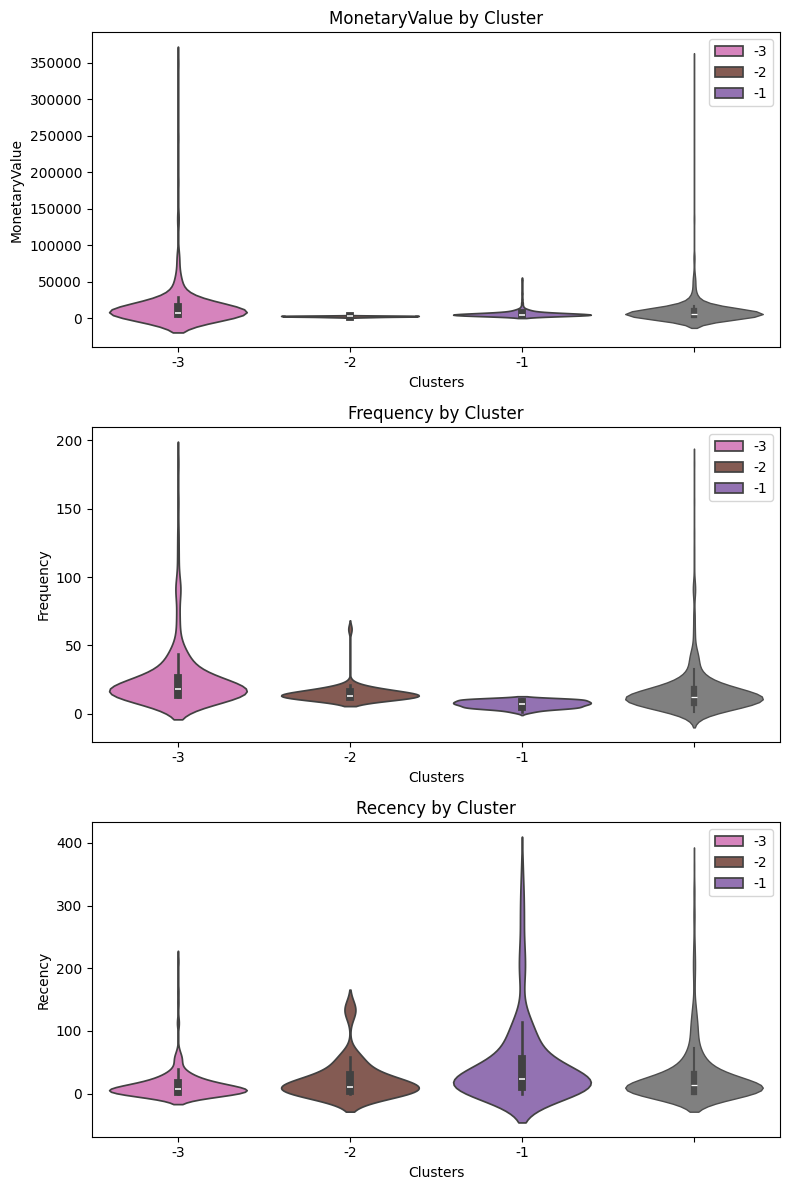

In [47]:
cluster_colors = {
    -1: "#9467bd",
    -2: "#8c564b",
    -3: "#e377c2"
}

cols = ["MonetaryValue", "Frequency", "Recency"]

plt.figure(figsize = (8, 12))

for i, col in enumerate(cols):
    plt.subplot(3, 1, i+1)
    sns.violinplot(x = outliers_clusters["Clusters"], y = outliers_clusters[col], palette = cluster_colors, hue = outliers_clusters["Clusters"])
    sns.violinplot(y = outliers_clusters[col], color = "grey", linewidth = 1.0)
    plt.title(f"{col} by Cluster")
    plt.ylabel(f"{col}")

plt.tight_layout()
plt.show()

1. Cluster -1 (Purple): "Occasional Buyers"
    - Customers who have made purchases very recently but with low monetary value and low purchase frequency.

2. Cluster -2 (Brown): "Mid-Term Low Spenders"
    - Customers who made purchases in the medium-term past with very low monetary value and minimal purchase frequency.

3. Cluster -3 (Pink): "High-Value Legacy Customers"
    - Historically valuable customers with the highest monetary value and purchase frequency but showing older, less recent activity.


In [48]:
cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "OCCASIONAL BUYERS",
    -2: "MID-TERM LOW SPENDERS",
    -3: "HIGH-VALUE LEGACY CUSTOMERS"
}

In [49]:
full_clustering = pd.concat([non_outlier_df_cluster, outliers_clusters])

full_clustering.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Clusters
0,12346.000,169.360,2,2010-06-28 13:53:00,164,1
1,12347.000,1323.320,2,2010-12-07 14:57:00,2,0
2,12348.000,221.160,1,2010-09-27 14:59:00,73,2
3,12349.000,2221.140,2,2010-10-28 08:23:00,42,0
4,12351.000,300.930,1,2010-11-29 15:23:00,10,2


In [50]:
full_clustering["Cluster Label"] = full_clustering["Clusters"].map(cluster_labels)

full_clustering.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Clusters,Cluster Label
0,12346.000,169.360,2,2010-06-28 13:53:00,164,1,RE-ENGAGE
1,12347.000,1323.320,2,2010-12-07 14:57:00,2,0,RETAIN
2,12348.000,221.160,1,2010-09-27 14:59:00,73,2,NURTURE
3,12349.000,2221.140,2,2010-10-28 08:23:00,42,0,RETAIN
4,12351.000,300.930,1,2010-11-29 15:23:00,10,2,NURTURE


C:\Users\rahul\AppData\Local\Temp\ipykernel_4324\1328271374.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, ha = "right")


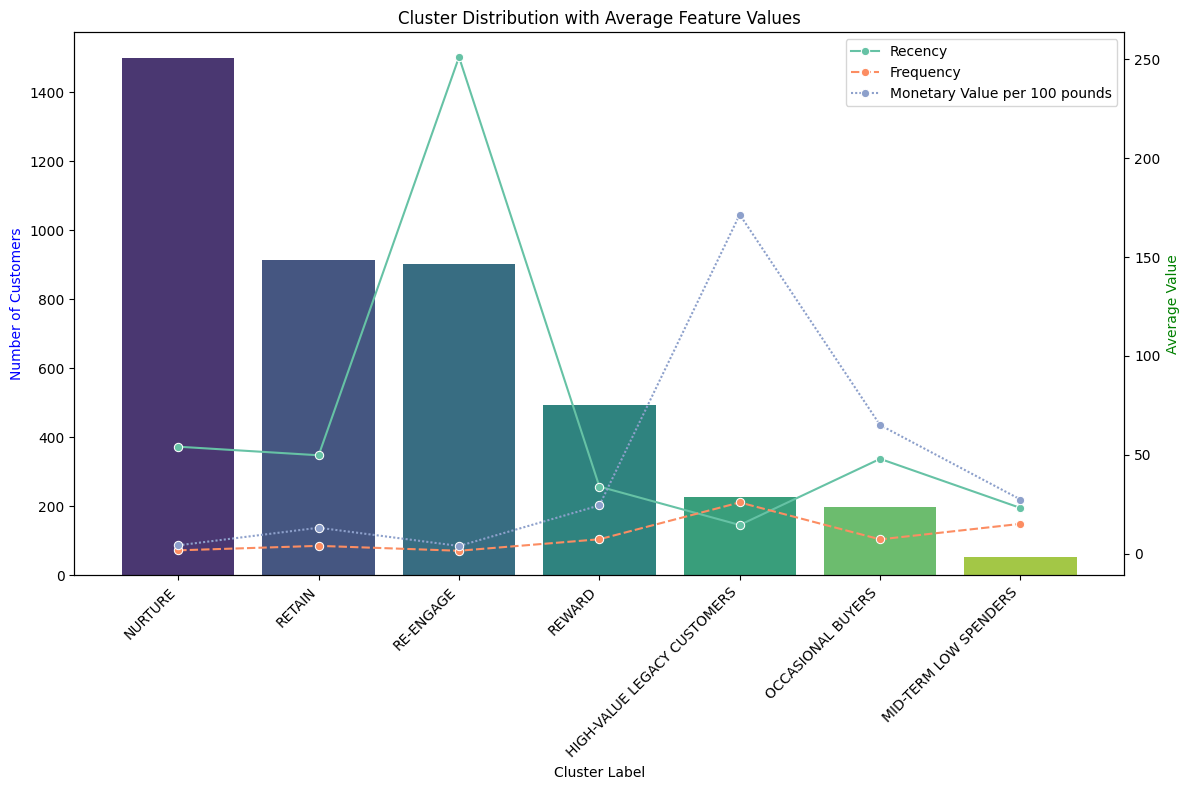

In [52]:
cluster_count = full_clustering["Cluster Label"].value_counts()
full_clustering["Monetary Value per 100 pounds"] = full_clustering["MonetaryValue"] / 100.0
feature_names = full_clustering.groupby("Cluster Label")[["Recency", "Frequency", "Monetary Value per 100 pounds"]].mean()

fig, ax1 = plt.subplots(figsize = (12, 8))

sns.barplot(x = cluster_count.index, y = cluster_count.values, ax = ax1, palette = "viridis", hue = cluster_count.index)
ax1.set_ylabel("Number of Customers", color = "b")
ax1.set_title("Cluster Distribution with Average Feature Values")

ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, ha = "right")

ax2 = ax1.twinx()

sns.lineplot(data = feature_names, ax = ax2, palette = "Set2", marker = "o")
ax2.set_ylabel("Average Value", color = "g")

plt.tight_layout()
plt.show()